# Introduction

The ["SARS-CoV-2 virus"](https://en.wikipedia.org/wiki/Severe_acute_respiratory_syndrome_coronavirus_2) (abbreviation for "Severe Acute Respiratory Syndrome CoronaVirus 2") spreads rapidly.

For the current spread of the virus see, e.g., the following map:

["Coronavirus COVID-19 Global Cases by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University (JHU)](https://coronavirus.jhu.edu/map.html).

It can cause a respiratory illness which is called ["COVID-19"](https://en.wikipedia.org/wiki/Coronavirus_disease_2019) (from "COronaVIrus Disease 2019").

In this context, machine learning engineers and researchers try to help.

Recently, [Kaggle](https://www.kaggle.com/) published the [CORD-19 dataset (COVID-19 Open Research Dataset)](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) - a dataset of over 51.000 (in version 7) medical articles related to corona-viruses:

>In response to the COVID-19 pandemic, the White House and a coalition of leading research groups have prepared the COVID-19 Open Research Dataset (CORD-19). CORD-19 is a resource of over 51,000 scholarly articles, including over 40,000 with full text, about COVID-19, SARS-CoV-2, and related coronaviruses. This freely available dataset is provided to the global research community to apply recent advances in natural language processing and other AI techniques to generate new insights in support of the ongoing fight against this infectious disease. There is a growing urgency for these approaches because of the rapid acceleration in new coronavirus literature, making it difficult for the medical research community to keep up.

[Quotation source](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge)

Notebook by [Prof. Dr. Jürgen Brauer](www.juergenbrauer.org)

# Goal of this notebook

This notebook tries to make use of the huge CORD-19 article dataset in order to find evidences for the currently discussed medications that may help against the virus.

To be more precise, this notebook is a try to give some answers to the CORD-19 challenge question:

["What do we know about vaccines and therapeutics?"](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge/tasks?taskId=561)

To focus the search we concentrate on drugs against COVID-19.

# All notebook settings at one place

Here we set all parameters in one code cell. This gives you an good overview what you can adjust before running the notebook.

Each parameter that can be set starts with `PARAM_`.

In [1]:
# What is the name of the dataset (including version string)
PARAM_dataset_name = "CORD-19 (version 7)"

# Where do you have stored the CORD-19 dataset on your computer?
PARAM_dataset_cord19 = "/home/juebrauer/link_to_vcd/12_datasets/01_cord-19-research-challenge-v7"

# What is the name of the CORD-19 metadata file?
PARAM_filename_metadata_cord19 = PARAM_dataset_cord19 + "/" + "metadata.csv"

# Filter for a specific virus?
PARAM_filter_for_specific_virus = False
PARAM_virus_name = "SARS"

# Methodology

Two steps:

- First we look at non CORD-19 articles: Which drugs (or more generally therapies) are mentioned here to fight the virus?
- On the basis of these articles, a list of promising drugs is compiled, for which evidence is then sought in CORD-19 dataset

# Identifying promising drugs (therapies)

We first compile a list of promising drugs against COVID-19. We use press articles and professional medial publications for compiling the list.

Why press articles to collect a list of possible drugs? Press articles are very topical and researchers from a wide range of research areas are often interviewed.


Here is a list of articles talking about COVID-19 related promising drugs:

- **Article title:** "Unlike FDA, European regulators refuse to clear chloroquine for COVID-19 without data"<br>
  **Article type:** Press article<br>
  **Article date:** 02.04.2020<br>
  **Link:** https://www.fiercepharma.com/pharma/europe-locks-down-chloroquine-scripts-as-researchers-china-report-positive-controlled-covid<br>
  **Drug candidates:** _Chloroquine, Hydroxychloroquine_
  
- **Article title:** "Coronavirus: New drug and vaccine show promise against COVID-19"<br>
  **Article type:** Press article<br>
  **Article date:** 03.04.2020<br>
  **Link:** https://www.newshub.co.nz/home/world/2020/04/coronavirus-new-drug-and-vaccine-show-promise-against-covid-19.html<br>
  **Drug candidates:** _APN01 (or APN001)_

- **Article title:** "Remdesivir most promising COVID-19 drug, say researchers"<br>
  **Article type:** Press article<br>
  **Article date:** 27.03.2020<br>
  **Link:** https://www.drugtargetreview.com/news/58608/remdesivir-most-promising-covid-19-drug-say-researchers/<br>
  **Drug candidates:** _remdesivir, tilarone_
  
- **Article title:** "COVID-19 Drug Therapy – Potential Options"<br>
  **Article type:** Medical publication<br>
  **Article date:** 26.03.2020<br>
  **Link:** https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=2ahUKEwjK5-flnszoAhWTilwKHaZPBDQQFjAAegQIBRAB&url=https%3A%2F%2Fwww.elsevier.com%2F__data%2Fassets%2Fpdf_file%2F0007%2F988648%2FCOVID-19-Drug-Therapy_Mar-2020.pdf&usg=AOvVaw25eIClQRNh7ipfOu0IvWEm<br>
  **Drug candidates:** _Chloroquine, Hydroxychloroquine, Lopinavir, Ritonavir, Remdesivir (GS-5734), Azithromycin, Tocilizumab_
  
- **Article title:** "COVID-19 drug repurposing research"<br>
  **Article type:** Wikipedia article<br>
  **Article date:** 03.04.2020<br>
  **Link:** https://en.wikipedia.org/wiki/COVID-19_drug_repurposing_research<br>
  **Drug candidates:** _Chloroquine, Favipiravir, Interferon beta (IFN-β), Lopinavir, Ritonavir, Remdesivir, Intravenous vitamin C, Azithromycin, Ciclesonide_
  
- **Article title:**<br>
  **Article type:**<br>
  **Article date:**<br>
  **Link:** 
  **Drug candidates:**
  
List of many other candidates: https://www.visualcapitalist.com/every-vaccine-treatment-covid-19-so-far/


In [2]:
drug_candidates = ["Chloroquine",
                   "Hydroxychloroquine",
                   "APN01",
                   "APN001",
                   "Remdesivir",
                   "GS-5734",
                   "Tilarone",
                   "Lopinavir",
                   "Ritonavir",
                   "Azithromycin",
                   "Tocilizumab",
                   "Favipiravir",
                   "Interferon beta",
                   "Intravenous vitamin C",
                   "Ciclesonide"
                  ]

In [3]:
nr_drug_candidates = len(drug_candidates)

In [4]:
nr_drug_candidates

15

In [5]:
drug_candidates_lower = []
for drug in drug_candidates:
    drug_candidates_lower.append( drug.lower() )

In [6]:
drug_candidates_lower

['chloroquine',
 'hydroxychloroquine',
 'apn01',
 'apn001',
 'remdesivir',
 'gs-5734',
 'tilarone',
 'lopinavir',
 'ritonavir',
 'azithromycin',
 'tocilizumab',
 'favipiravir',
 'interferon beta',
 'intravenous vitamin c',
 'ciclesonide']

# Some notes regarding the candidates

Some notes regarding the candidates:

- many candidates fall into the category of "drug repositioning" (drug repurposing), which is the repurposing of an approved drug for the treatment of another disease

- "chloroquine" and "hydroxychloroquine" are anti-malarial drugs<br>
  Source: https://www.cnbc.com/2020/03/30/who-says-early-data-shows-some-drugs-may-have-an-impact-on-coronavirus-but-more-research-is-needed.html
  
- Lopinavir, Ritonavir are HIV Protease Inhibitor<br>
  Source: "COVID-19 Drug Therapy – Potential Options", Elsevier 26.03.2020


# Some meta-data analysis of the CORD-19 dataset

## Read in meta-data

In [7]:
# Read in the metadata file

import pandas as pd
df = pd.read_csv(PARAM_filename_metadata_cord19)

In [8]:
df.shape

(51078, 18)

In [9]:
# Show first 5 rows of the metadata
# to get a feeling for the metadata

df.head(5)

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,xqhn0vbp,1e1286db212100993d03cc22374b624f7caee956,PMC,Airborne rhinovirus detection and effect of ul...,10.1186/1471-2458-3-5,PMC140314,12525263.0,no-cc,"BACKGROUND: Rhinovirus, the most common cause ...",2003-01-13,"Myatt, Theodore A; Johnston, Sebastian L; Rudn...",BMC Public Health,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
1,gi6uaa83,8ae137c8da1607b3a8e4c946c07ca8bda67f88ac,PMC,Discovering human history from stomach bacteria,10.1186/gb-2003-4-5-213,PMC156578,12734001.0,no-cc,Recent analyses of human pathogens have reveal...,2003-04-28,"Disotell, Todd R",Genome Biol,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
2,le0ogx1s,NaN,PMC,A new recruit for the army of the men of death,10.1186/gb-2003-4-7-113,PMC193621,12844350.0,no-cc,"The army of the men of death, in John Bunyan's...",2003-06-27,"Petsko, Gregory A",Genome Biol,NaN,NaN,False,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,fy4w7xz8,0104f6ceccf92ae8567a0102f89cbb976969a774,PMC,Association of HLA class I with severe acute r...,10.1186/1471-2350-4-9,PMC212558,12969506.0,no-cc,BACKGROUND: The human leukocyte antigen (HLA) ...,2003-09-12,"Lin, Marie; Tseng, Hsiang-Kuang; Trejaut, Jean...",BMC Med Genet,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...
4,0qaoam29,5b68a553a7cbbea13472721cd1ad617d42b40c26,PMC,A double epidemic model for the SARS propagation,10.1186/1471-2334-3-19,PMC222908,12964944.0,no-cc,BACKGROUND: An epidemic of a Severe Acute Resp...,2003-09-10,"Ng, Tuen Wai; Turinici, Gabriel; Danchin, Antoine",BMC Infect Dis,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...


Some column names and meanings:

  * cord_uid: a unique identifier for each article in the CORD-19 dataset
  * sha: many of the paper records have PDFs and the hash of the PDFs are in 'sha'
  * source_x: where is the article published?
  * title: title of the article
  * doi: the [Digital Object Identifier (DOI)](https://en.wikipedia.org/wiki/Digital_object_identifier) of the article. Why DOIs? DOIs are fixed, while URLs (website addresses) can change
  * pcmid: id present if it is a "PubMed Central (PMC)" article. "PubMed Central" is a free full-text archive of biomedical and life sciences journal literature at the U.S. National Institutes of Health's National Library of Medicine (NIH/NLM)
  * ...

|   |   |   |   |   |
|---|---|---|---|---|
|   |   |   |   |   |

## Analyze publication years of articles

In [10]:
dates = pd.to_datetime(df["publish_time"])
dates

0       2003-01-13
1       2003-04-28
2       2003-06-27
3       2003-09-12
4       2003-09-10
           ...    
51073   2019-06-30
51074   2014-02-28
51075   2008-12-18
51076   2013-10-31
51077   1991-12-31
Name: publish_time, Length: 51078, dtype: datetime64[ns]

In [11]:
type(dates)

pandas.core.series.Series

In [12]:
publication_years = []
for date in dates:
    year = date.year
    if not isinstance(year,int):
        print("Article found with unknown publication year (year={0})".format(year))
    else:
        publication_years.append( year )

Article found with unknown publication year (year=nan)
Article found with unknown publication year (year=nan)
Article found with unknown publication year (year=nan)
Article found with unknown publication year (year=nan)
Article found with unknown publication year (year=nan)
Article found with unknown publication year (year=nan)
Article found with unknown publication year (year=nan)
Article found with unknown publication year (year=nan)


In [13]:
publication_years[:20]

[2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004]

In [14]:
earliest_publication = min(publication_years)
earliest_publication

1951

In [15]:
latest_publication = max(publication_years)
latest_publication

2020

In [16]:
import numpy as np
list_of_years = list(np.arange(earliest_publication,latest_publication+1))

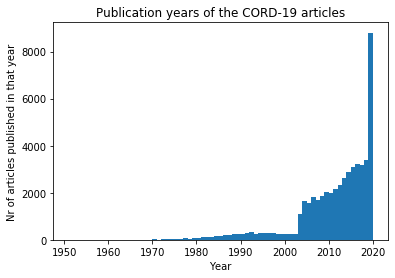

In [17]:
import matplotlib.pyplot as plt
hist_data = plt.hist( publication_years, bins=list_of_years )
plt.title("Publication years of the CORD-19 articles")
plt.xlabel("Year")
plt.ylabel("Nr of articles published in that year")
plt.show()

# Search for evidence in article titles

In [18]:
titles_column = df["title"]

In [19]:
type(titles_column)

pandas.core.series.Series

In [20]:
titles_column

0        Airborne rhinovirus detection and effect of ul...
1          Discovering human history from stomach bacteria
2           A new recruit for the army of the men of death
3        Association of HLA class I with severe acute r...
4         A double epidemic model for the SARS propagation
                               ...                        
51073    Prevalence of antibodies against transmissible...
51074    Can we increase public awareness without creat...
51075    Fast degrading polyesters as siRNA nano-carrie...
51076    eIF3f: A central regulator of the antagonism a...
51077    The pathogenic role of virus-specific antibody...
Name: title, Length: 51078, dtype: object

In [21]:
counter_per_drug = np.zeros( nr_drug_candidates, np.int)

In [22]:
counter_per_drug

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
for article_nr,title in enumerate(titles_column):
    
    # some titles are NaN!
    if not isinstance(title,str):
        #print("Title of article {0} is not given".format(article_nr))
        continue
    
    for drug_nr,drug in enumerate(drug_candidates_lower):
        
        found = False
        if PARAM_filter_for_specific_virus:
            if (drug in title) and (PARAM_virus_name in title):
                found = True
        else:
            if drug in title:
                found = True
                
        if found:
            print("article #{0} mentions '{1}': {2}".format(article_nr, drug, title))        
            counter_per_drug[drug_nr] += 1

article #166 mentions 'chloroquine': In vitro inhibition of human influenza A virus replication by chloroquine
article #306 mentions 'chloroquine': Different pH requirements are associated with divergent inhibitory effects of chloroquine on human and avian influenza A viruses
article #1554 mentions 'azithromycin': Randomized placebo-controlled trial on azithromycin to reduce the morbidity of bronchiolitis in Indigenous Australian infants: rationale and protocol
article #3306 mentions 'chloroquine': Dual role of chloroquine in liver ischemia reperfusion injury: reduction of liver damage in early phase, but aggravation in late phase
article #4995 mentions 'chloroquine': Studying the effect of chloroquine on sporozoite-induced protection and immune responses in Plasmodium berghei malaria
article #7771 mentions 'chloroquine': Targeting endosomal acidification by chloroquine analogs as a promising strategy for the treatment of emerging viral diseases
article #8678 mentions 'lopinavir': Trea

Now let us plot how often each drug candidate is mentioned in a title:

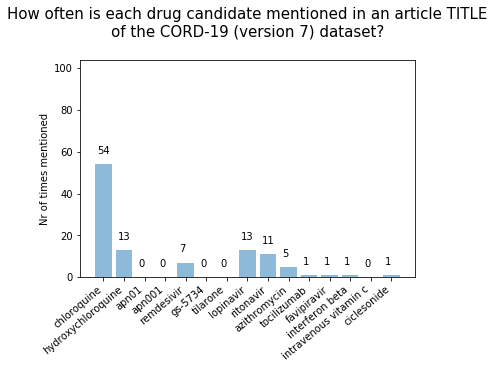

In [24]:
fig1, ax1 = plt.subplots()

ax1.bar(drug_candidates_lower, counter_per_drug, align='center', alpha=0.5)

xticks = np.arange(len(drug_candidates_lower))
ax1.set_xticks(xticks)
ax1.set_xticklabels(drug_candidates_lower, rotation=40, ha="right")

ax1.set_ylim(0.0, max(counter_per_drug) + 50)

ax1.set_title( "How often is each drug candidate mentioned in an article TITLE\nof the {0} dataset?\n"
              .format(PARAM_dataset_name), fontsize=15 )

ax1.set_ylabel( "Nr of times mentioned" )

for i, counter in enumerate(counter_per_drug):
    ax1.text(i - 0.3, counter + 5, "{0}".format(counter), color='black')
    
plt.show()

# Search for evidence in article abstracts

In [25]:
abstract_column = df["abstract"]

In [26]:
abstract_column

0        BACKGROUND: Rhinovirus, the most common cause ...
1        Recent analyses of human pathogens have reveal...
2        The army of the men of death, in John Bunyan's...
3        BACKGROUND: The human leukocyte antigen (HLA) ...
4        BACKGROUND: An epidemic of a Severe Acute Resp...
                               ...                        
51073    Abstract Transmissible gastroenteritis (TGE) i...
51074                                                  NaN
51075    Abstract A potential siRNA carrier for pulmona...
51076    Abstract The eukaryotic initiation factor 3 su...
51077                                                  NaN
Name: abstract, Length: 51078, dtype: object

In [27]:
abstract_column

0        BACKGROUND: Rhinovirus, the most common cause ...
1        Recent analyses of human pathogens have reveal...
2        The army of the men of death, in John Bunyan's...
3        BACKGROUND: The human leukocyte antigen (HLA) ...
4        BACKGROUND: An epidemic of a Severe Acute Resp...
                               ...                        
51073    Abstract Transmissible gastroenteritis (TGE) i...
51074                                                  NaN
51075    Abstract A potential siRNA carrier for pulmona...
51076    Abstract The eukaryotic initiation factor 3 su...
51077                                                  NaN
Name: abstract, Length: 51078, dtype: object

In [28]:
abstract_column[0]

'BACKGROUND: Rhinovirus, the most common cause of upper respiratory tract infections, has been implicated in asthma exacerbations and possibly asthma deaths. Although the method of transmission of rhinoviruses is disputed, several studies have demonstrated that aerosol transmission is a likely method of transmission among adults. As a first step in studies of possible airborne rhinovirus transmission, we developed methods to detect aerosolized rhinovirus by extending existing technology for detecting infectious agents in nasal specimens. METHODS: We aerosolized rhinovirus in a small aerosol chamber. Experiments were conducted with decreasing concentrations of rhinovirus. To determine the effect of UV irradiation on detection of rhinoviral aerosols, we also conducted experiments in which we exposed aerosols to a UV dose of 684 mJ/m(2). Aerosols were collected on Teflon filters and rhinovirus recovered in Qiagen AVL buffer using the Qiagen QIAamp Viral RNA Kit (Qiagen Corp., Valencia, Ca

In [29]:
counter_per_drug = np.zeros( nr_drug_candidates, np.int)

In [30]:
counter_per_drug

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
nr_of_missing_abstracts = 0

for article_nr,abstract in enumerate(abstract_column):
    
    # some abstracts are NaN!
    if not isinstance(abstract,str):
        #print("Abstract {0} is not given".format(article_nr))
        nr_of_missing_abstracts += 1
        
print("There are {0} missing article abstracts!".format(nr_of_missing_abstracts))        

There are 8726 missing article abstracts!


In [32]:
for article_nr,abstract in enumerate(abstract_column):
    
    # some abstracts are NaN!
    if not isinstance(abstract,str):
        #print("Abstract {0} is not given".format(article_nr))
        continue
    
    for drug_nr,drug in enumerate(drug_candidates_lower):
        
             
        found = False
        if PARAM_filter_for_specific_virus:
            if (drug in abstract) and (PARAM_virus_name in abstract):
                found = True
        else:
            if drug in abstract:
                found = True
                
        if found:
            print("Abstract of article #{0} mentions '{1}'".format(article_nr, drug))
            counter_per_drug[drug_nr] += 1

Abstract of article #101 mentions 'chloroquine'
Abstract of article #130 mentions 'interferon beta'
Abstract of article #166 mentions 'chloroquine'
Abstract of article #212 mentions 'lopinavir'
Abstract of article #212 mentions 'ritonavir'
Abstract of article #306 mentions 'chloroquine'
Abstract of article #814 mentions 'interferon beta'
Abstract of article #1079 mentions 'chloroquine'
Abstract of article #1554 mentions 'azithromycin'
Abstract of article #2497 mentions 'chloroquine'
Abstract of article #2839 mentions 'azithromycin'
Abstract of article #3009 mentions 'chloroquine'
Abstract of article #3204 mentions 'chloroquine'
Abstract of article #3241 mentions 'chloroquine'
Abstract of article #3264 mentions 'interferon beta'
Abstract of article #3306 mentions 'chloroquine'
Abstract of article #3517 mentions 'azithromycin'
Abstract of article #3849 mentions 'chloroquine'
Abstract of article #3948 mentions 'chloroquine'
Abstract of article #3997 mentions 'chloroquine'
Abstract of arti

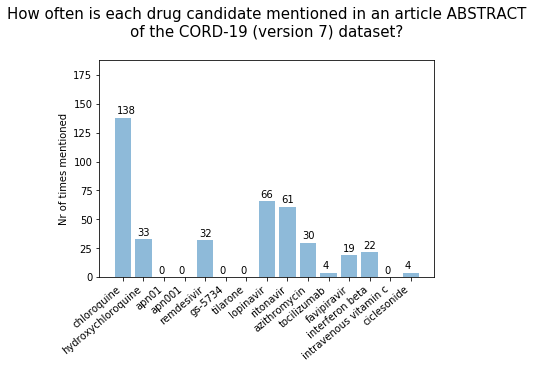

In [33]:
fig1, ax1 = plt.subplots()

ax1.bar(drug_candidates_lower, counter_per_drug, align='center', alpha=0.5)

xticks = np.arange(len(drug_candidates_lower))
ax1.set_xticks(xticks)
ax1.set_xticklabels(drug_candidates_lower, rotation=40, ha="right")

ax1.set_ylim(0.0, max(counter_per_drug) + 50)

ax1.set_title( "How often is each drug candidate mentioned in an article ABSTRACT\nof the {0} dataset?\n"
              .format(PARAM_dataset_name), fontsize=15 )

ax1.set_ylabel( "Nr of times mentioned" )

for i, counter in enumerate(counter_per_drug):
    ax1.text(i - 0.3, counter + 3, "{0}".format(counter), color='black')
    
plt.show()